In [ ]:

# Importando os pacotes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o algoritmo K-Means:
from sklearn.cluster import KMeans

# Métrica de avaliação para modelos de clustering:
from sklearn.metrics import silhouette_score

# Vamos utilizar o dataset Iris dentro do pacote datasets do sklearn:
from sklearn import datasets

# O pacote warnings inibe a visualização de avisos nos outputs do Colab.
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/Nuclear_Electricity_Statistics_2022.csv')

In [ ]:
df.head()

,Country,Total Net Electrical Capacity [MW],Number of Operated Reactors,Nuclear Electricity Supplied [GW.h],Nuclear Share [%]
0,ARGENTINA,1641,3,7469.52,5.4
1,ARMENIA,416,1,2630.85,31.0
2,BELARUS,1110,1,4411.35,11.9
3,BELGIUM,5942,7,41744.41,46.4
4,BRAZIL,1884,2,13744.82,2.5


In [ ]:
df = df.dropna()

In [ ]:
df.tail(5)

,Country,Total Net Electrical Capacity [MW],Number of Operated Reactors,Nuclear Electricity Supplied [GW.h],Nuclear Share [%]
26,SWEDEN,6937,6,50018.23,29.4
27,SWITZERLAND,2973,4,23179.56,36.4
28,UNITED ARAB EMIRATES,4011,3,19300.45,12.4
29,UNITED KINGDOM,7343,12,43604.79,14.2
30,UNITED STATES OF AMERICA,95523,93,772220.52,18.2


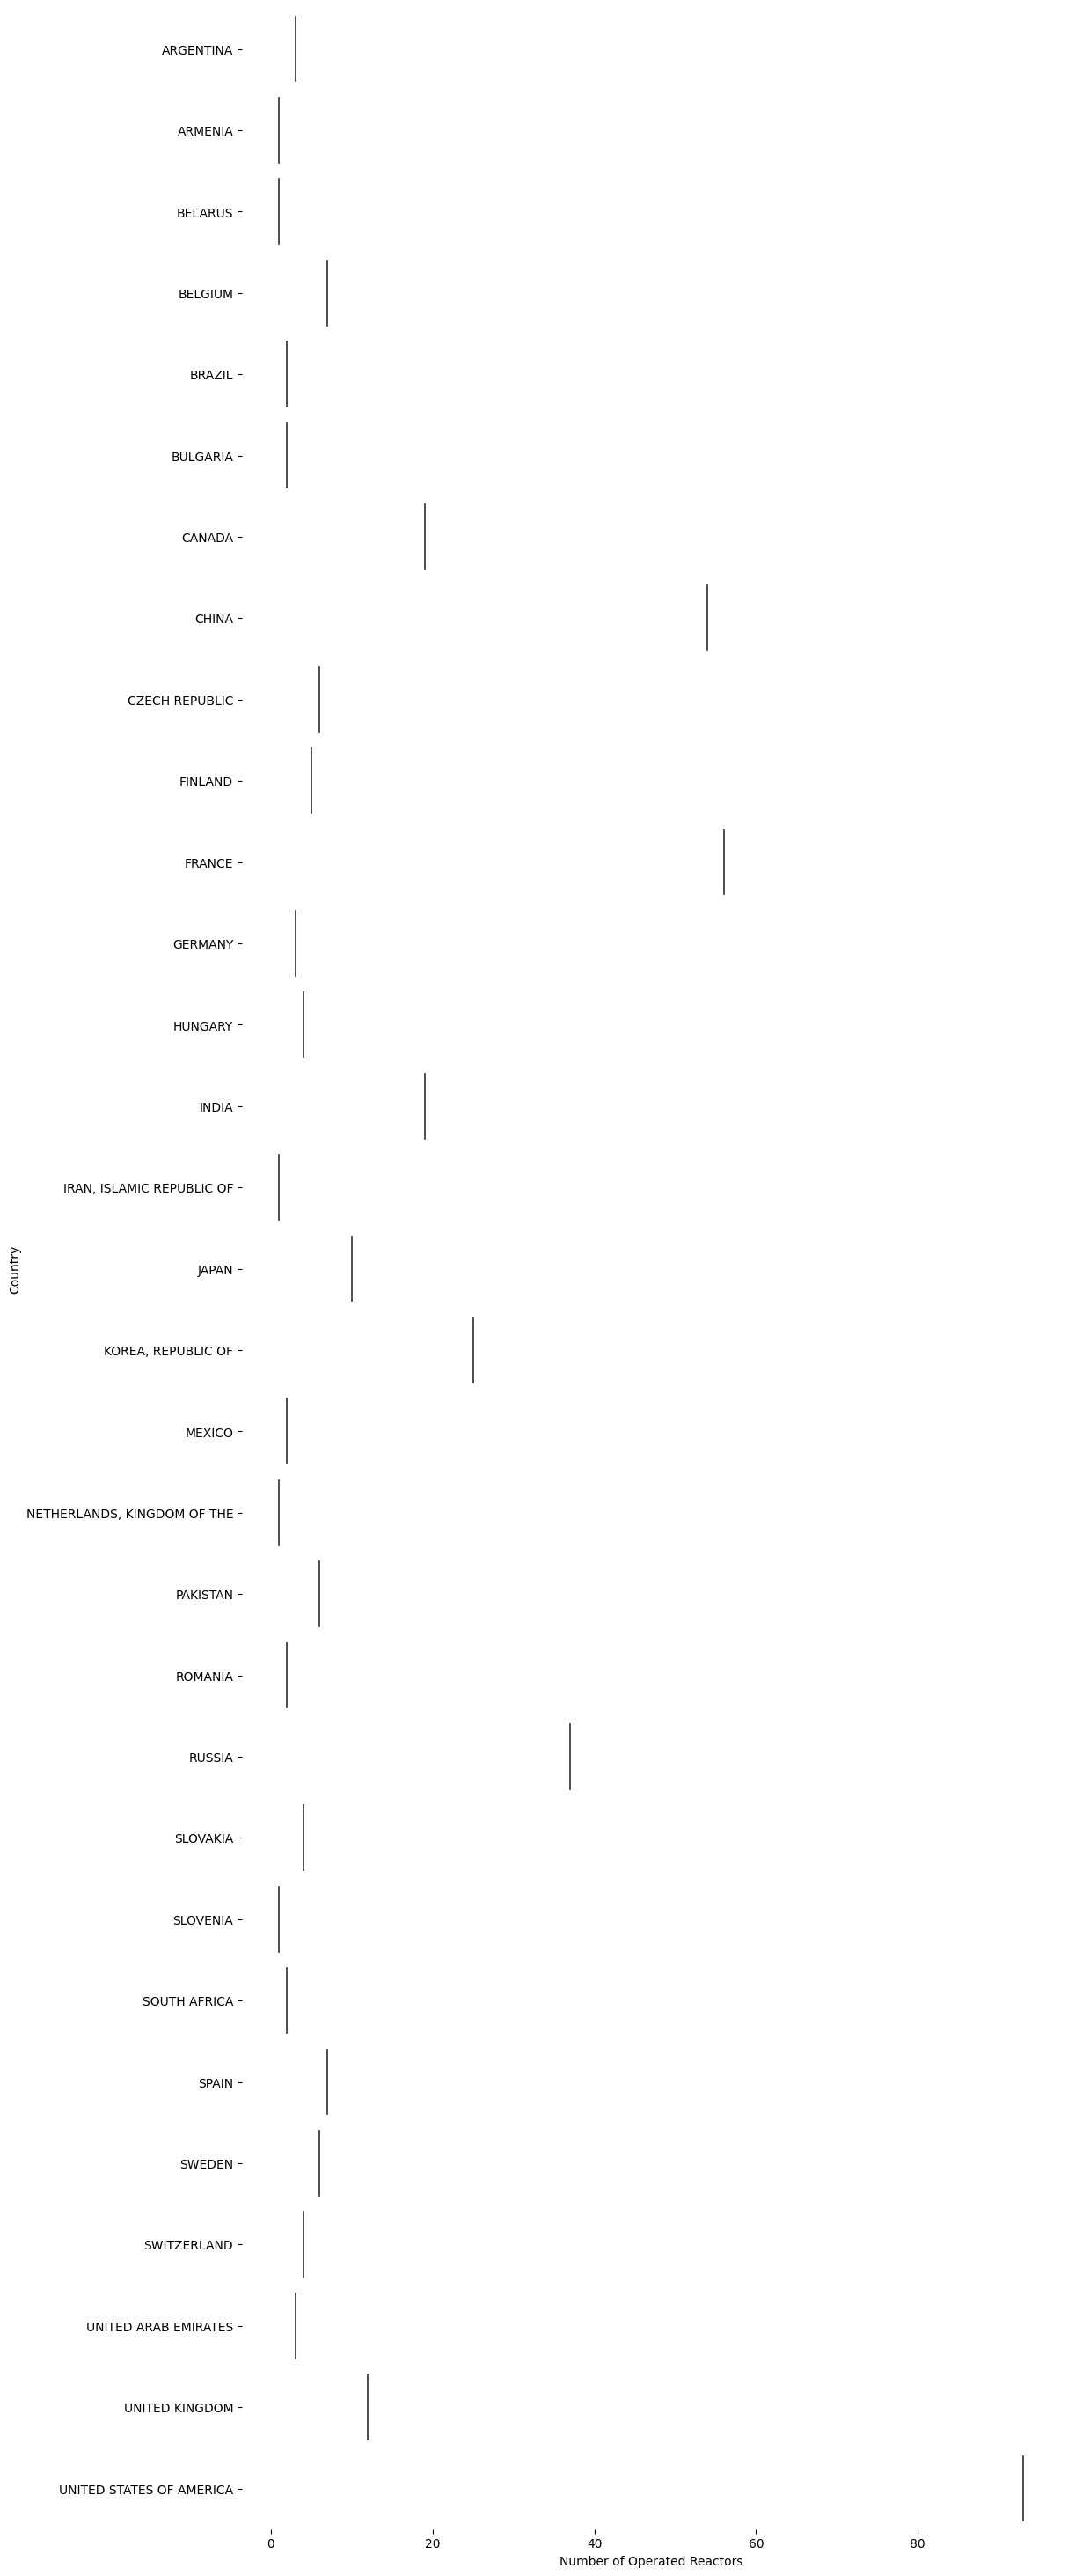

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Number of Operated Reactors', y='Country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.describe()

,Total Net Electrical Capacity [MW],Number of Operated Reactors,Nuclear Electricity Supplied [GW.h],Nuclear Share [%]
count,31.000000,31.000000,31.000000,31.000000
mean,11556.322581,12.838710,79481.209355,21.835484
std,21177.823084,20.722125,156417.204764,17.487625
min,416.000000,1.000000,2630.850000,1.700000
25%,1747.500000,2.000000,10380.750000,5.600000
50%,3934.000000,4.000000,23179.560000,18.200000
75%,7233.000000,11.000000,50962.870000,33.800000
max,95523.000000,93.000000,772220.520000,62.600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              31 non-null     object 
 1   Total Net Electrical Capacity [MW]   31 non-null     int64  
 2   Number of Operated Reactors          31 non-null     int64  
 3   Nuclear Electricity Supplied [GW.h]  31 non-null     float64
 4   Nuclear Share [%]                    31 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.5+ KB


In [ ]:
media_pais = df.groupby('Country').mean()
print(media_pais)

                             Total Net Electrical Capacity [MW]  \
Country                                                           
ARGENTINA                                                1641.0   
ARMENIA                                                   416.0   
BELARUS                                                  1110.0   
BELGIUM                                                  5942.0   
BRAZIL                                                   1884.0   
BULGARIA                                                 2006.0   
CANADA                                                  13624.0   
CHINA                                                   52131.0   
CZECH REPUBLIC                                           3934.0   
FINLAND                                                  4394.0   
FRANCE                                                  61370.0   
GERMANY                                                  4055.0   
HUNGARY                                                  1916.

<Axes: xlabel='Total Net Electrical Capacity [MW]', ylabel='Number of Operated Reactors'>

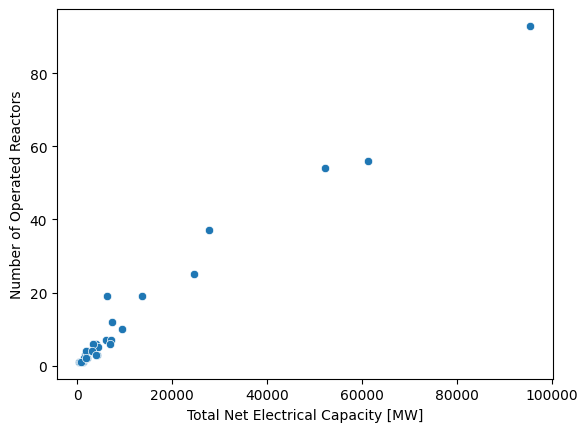

In [ ]:

figure_size =(10,6)
sns.scatterplot(data= df , x ='Total Net Electrical Capacity [MW]' , y  ='Number of Operated Reactors' , alpha = 1.0 )

com isso podemos ver que o numero de usinas com alta taxa de produção(maior que 40000 MW) é baixo.

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country'])
print(df[['Country', 'Country_encoded']].head())

     Country  Country_encoded
0  ARGENTINA                0
1    ARMENIA                1
2    BELARUS                2
3    BELGIUM                3
4     BRAZIL                4


In [ ]:
df.head()

,Country,Total Net Electrical Capacity [MW],Number of Operated Reactors,Nuclear Electricity Supplied [GW.h],Nuclear Share [%],Country_encoded
0,ARGENTINA,1641,3,7469.52,5.4,0
1,ARMENIA,416,1,2630.85,31.0,1
2,BELARUS,1110,1,4411.35,11.9,2
3,BELGIUM,5942,7,41744.41,46.4,3
4,BRAZIL,1884,2,13744.82,2.5,4


<Axes: xlabel='Nuclear Share [%]', ylabel='Count'>

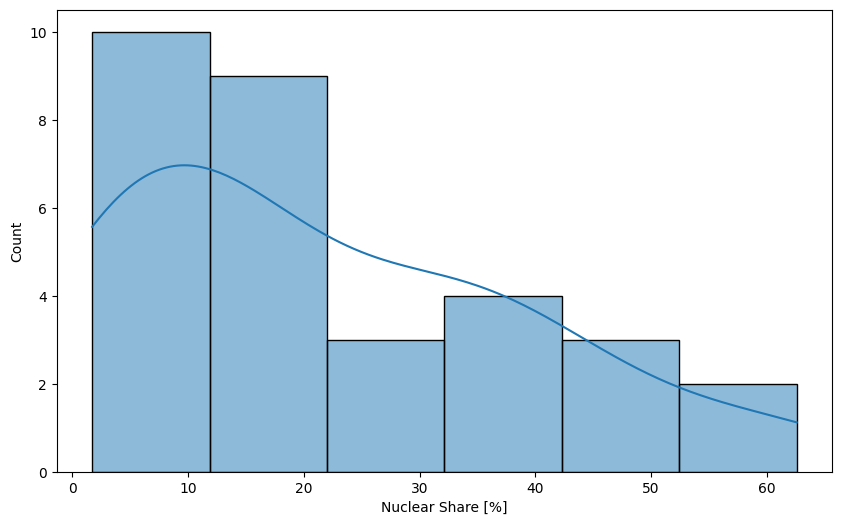

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Nuclear Share [%]'], kde=True)



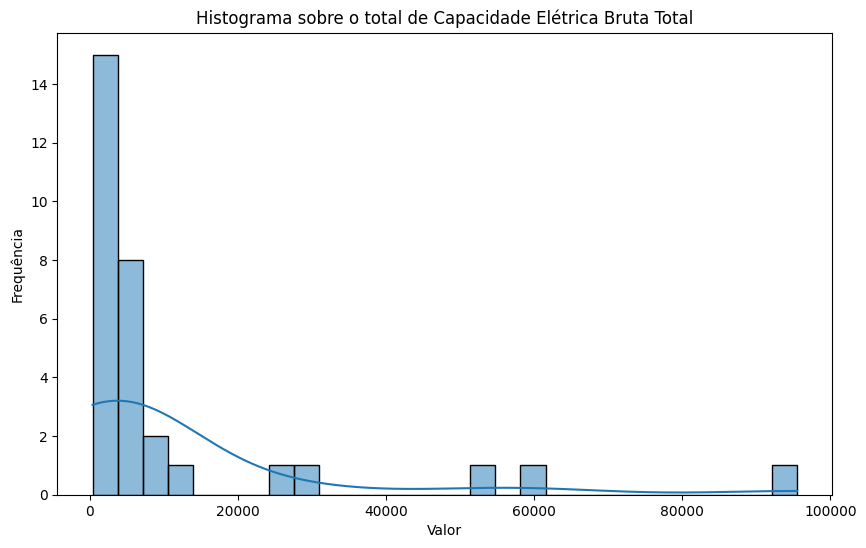

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Net Electrical Capacity [MW]'], kde=True)

plt.title('Histograma sobre o total de Capacidade Elétrica Bruta Total')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

pré processamento


In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [ ]:
df.drop('Country', axis=1, inplace=True)

In [ ]:
distorcoes = []

K = range(1,10) # Adotando 10 clusters.
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df)    # Treinamos o modelo com o algoritmo K-Means por 10 vezes
    distorcoes.append(modelo01.inertia_)


In [ ]:
distorcoes

[747445288639.1681,
 194810081375.7316,
 41145848228.30594,
 17644346773.47671,
 10245370976.06758,
 3528316663.4871264,
 2691177386.1823144,
 1652963516.3238423,
 557445634.9683743]

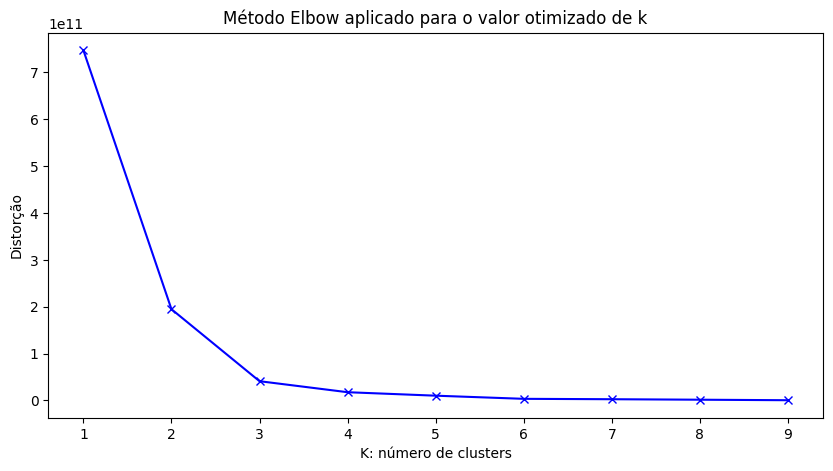

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

# Define os labels do eixos do gráfico:
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Define um título para o gráfico:
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostra o gráfico:
plt.show()

In [ ]:
modelo_KMeans = KMeans(n_clusters=3)
modelo_KMeans.fit(df)

KMeans(n_clusters=3)

In [ ]:
df['clusters'] = modelo_KMeans.predict(df)

In [ ]:
silhouette = silhouette_score(df, df['clusters'])
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.8125


In [ ]:
df.sample(5)

,Total Net Electrical Capacity [MW],Number of Operated Reactors,Nuclear Electricity Supplied [GW.h],Nuclear Share [%],Country_encoded,clusters
14,915,1,6008.02,1.7,14,0
18,482,1,3930.56,3.3,18,0
21,27727,37,209516.56,19.6,21,1
22,1868,4,14830.26,59.2,22,0
23,688,1,5310.70,42.8,23,0


In [ ]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Total Net Electrical Capacity [MW]   31 non-null     int64  
 1   Number of Operated Reactors          31 non-null     int64  
 2   Nuclear Electricity Supplied [GW.h]  31 non-null     float64
 3   Nuclear Share [%]                    31 non-null     float64
 4   Country_encoded                      31 non-null     int64  
 5   clusters                             31 non-null     int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 2.6 KB


In [ ]:
modelo_regressao = LinearRegression()

In [ ]:
X = df[['Number of Operated Reactors', 'Country_encoded']]
y = df['Total Net Electrical Capacity [MW]']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
modelo_regressao = LinearRegression() # You can also use: modelo_regressao = model
modelo_regressao.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = modelo_regressao.predict(X_test)

In [ ]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)


In [ ]:

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared: 0.7486
Mean Squared Error (MSE): 1814680.5578
Root Mean Squared Error (RMSE): 1347.1008
Mean Absolute Error (MAE): 1004.3245


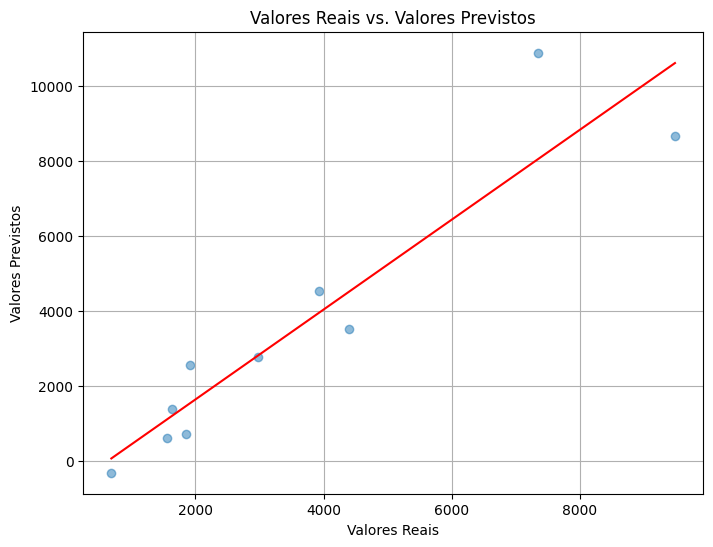

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)), color='red')  # Regression line
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Valores Reais vs. Valores Previstos")
plt.grid(True)
plt.show()